# 126 Years of Olympic Data Analysis

In [2]:
#import the libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [87]:

# Relative path to the folder where your CSV files are located
base_path = 'downloads/Olympics Dataset/'

# Load each CSV file into a pandas DataFrame
df_athlete_biography = pd.read_csv(base_path + 'Olympic_Athlete_Biography.csv')
df_athlete_event_details = pd.read_csv(base_path + 'Olympic_Athlete_Event_Details.csv')
df_country_profiles = pd.read_csv(base_path + 'Olympic_Country_Profiles.csv')
df_event_results = pd.read_csv(base_path + 'Olympic_Event_Results.csv')
df_games_summary = pd.read_csv(base_path + 'Olympic_Games_Summary.csv')
df_medal_tally_history = pd.read_csv(base_path + 'Olympic_Medal_Tally_History.csv')



# Get basic information about each DataFrame

In [18]:
print(df_athlete_biography.info())
print(df_athlete_event_details.info())
print(df_country_profiles.info())
print(df_event_results.info())
print(df_games_summary.info())
print(df_medal_tally_history.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2

#Data Cleaning and Preparation
#Handle Missing Values
#Identify and handle missing or null values.
#Decide whether to drop or fill these values.

In [27]:
# Check for missing values
print(df_athlete_biography.isnull().sum())
print(df_athlete_event_details.isnull().sum())
print(df_country_profiles.isnull().sum())
print(df_event_results.isnull().sum())
print(df_games_summary.isnull().sum())
print(df_medal_tally_history.isnull().sum())

athlete_id            0
name                  0
sex                   0
born               4053
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64
edition             0
edition_id          0
country_noc         0
sport               0
event               0
result_id           0
athlete             0
athlete_id          0
pos                 0
medal          272147
isTeamSport         0
dtype: int64
noc        0
country    0
dtype: int64
result_id              0
event_title            0
edition                0
edition_id             0
sport                  0
sport_url              0
result_date            0
result_location        1
result_participants    0
result_format          0
result_detail          0
result_description     0
dtype: int64
edition              0
edition_id           0
edition_url          0
year                 0
city                 0
country_flag_url     0
co

# Drop rows with missing values


In [23]:
df_athlete_biography_clean = df_athlete_biography.dropna()
df_athlete_event_details_clean = df_athlete_event_details.dropna()
df_country_profiles_clean = df_country_profiles.dropna()
df_event_results_clean = df_event_results.dropna()
df_games_summary_clean = df_games_summary.dropna()
df_medal_tally_history_clean = df_medal_tally_history.dropna()

# Check if any missing values remain


 # Drop Columns with Missing Values

In [25]:
df_athlete_biography_clean = df_athlete_biography.dropna(axis=1)
df_athlete_event_details_clean = df_athlete_event_details.dropna(axis=1)
df_country_profiles_clean = df_country_profiles.dropna(axis=1)
df_event_results_clean = df_event_results.dropna(axis=1)
df_games_summary_clean = df_games_summary.dropna(axis=1)
df_medal_tally_history_clean = df_medal_tally_history.dropna(axis=1)

In [88]:
# Check if any missing values remain


# Create a connection to the SQLite database


In [28]:
conn = sqlite3.connect('olympic_data.db')

# Load each DataFrame into a table in the SQLite database
df_athlete_biography.to_sql('athlete_biography', conn, if_exists='replace', index=False)
df_athlete_event_details.to_sql('athlete_event_details', conn, if_exists='replace', index=False)
df_country_profiles.to_sql('country_profiles', conn, if_exists='replace', index=False)
df_event_results.to_sql('event_results', conn, if_exists='replace', index=False)
df_games_summary.to_sql('games_summary', conn, if_exists='replace', index=False)
df_medal_tally_history.to_sql('medal_tally_history', conn, if_exists='replace', index=False)


1807

In [29]:
# Verify the tables are loaded
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                    name
0      athlete_biography
1  athlete_event_details
2       country_profiles
3          event_results
4          games_summary
5    medal_tally_history


# Top 10 Countries by Total Medal Count

In [63]:
query = '''
    SELECT country, SUM(total) as Total_Medals
    FROM medal_tally_history
    GROUP BY country
    ORDER BY Total_Medals DESC
    LIMIT 10;
'''
top_countries_total_medals = pd.read_sql(query, conn)
top_countries_total_medals

,country,Total_Medals
0,United States,3009
1,Soviet Union,1204
2,Germany,1098
3,Great Britain,988
4,France,951
5,Italy,789
6,People's Republic of China,713
7,Sweden,697
8,Japan,575
9,Norway,569


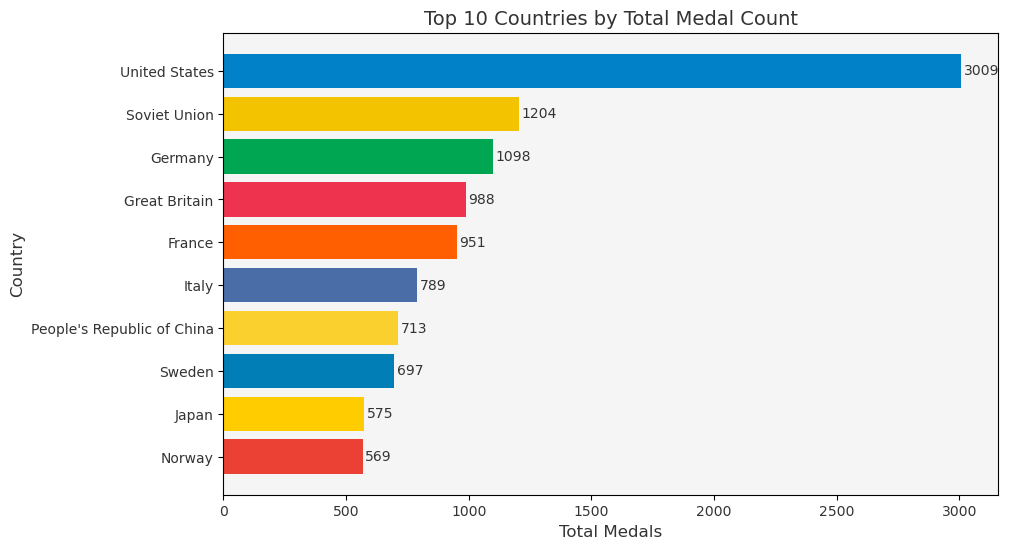

In [68]:
import matplotlib.pyplot as plt

# Olympic theme colors
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.barh(top_countries_total_medals['country'], top_countries_total_medals['Total_Medals'], color=bar_colors)
plt.xlabel('Total Medals', fontsize=12, color='#333333')
plt.ylabel('Country', fontsize=12, color='#333333')
plt.title('Top 10 Countries by Total Medal Count', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for better contrast

# Adding the medal count outside each bar, in a different color for visibility
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', color='#333333', fontsize=10)  # Darker text color

plt.show()

# Top 10 Athletes with the Most Medals

In [49]:
query = '''
    SELECT athlete, COUNT(medal) as Total_Medals
    FROM athlete_event_details
    WHERE medal IS NOT NULL
    GROUP BY athlete
    ORDER BY Total_Medals DESC
    LIMIT 10;
'''
top_athletes_medals = pd.read_sql(query, conn)
top_athletes_medals

,athlete,Total_Medals
0,Michael Phelps,28
1,Larisa Latynina,18
2,Nikolay Andrianov,15
3,Marit Bjørgen,15
4,Takashi Ono,13
5,Ole Einar Bjørndalen,13
6,Jenny Thompson,13
7,Ireen Wüst,13
8,Edoardo Mangiarotti,13
9,Boris Shakhlin,13


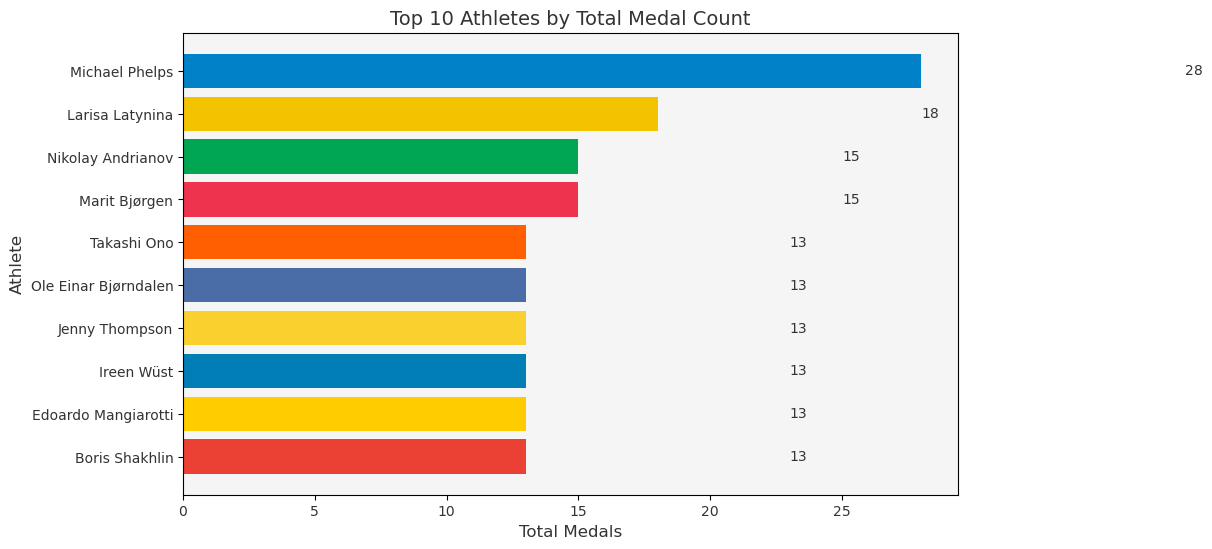

In [70]:
# Olympic theme colors for athletes
athlete_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.barh(top_athletes_medals['athlete'], top_athletes_medals['Total_Medals'], color=athlete_colors)
plt.xlabel('Total Medals', fontsize=12, color='#333333')
plt.ylabel('Athlete', fontsize=12, color='#333333')
plt.title('Top 10 Athletes by Total Medal Count', fontsize=14, color='#333333')
plt.gca().invert_yaxis()

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')

# Adding the medal count outside each bar
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', color='#333333', fontsize=10)

plt.show()

# Top 5 Most Popular Sports by Medal Count

In [48]:
query = '''
    SELECT sport, COUNT(medal) as Total_Medals
    FROM athlete_event_details
    WHERE medal IS NOT NULL
    GROUP BY sport
    ORDER BY Total_Medals DESC
    LIMIT 5;
'''
top_sports_medals = pd.read_sql(query, conn)
top_sports_medals

,sport,Total_Medals
0,Athletics,4509
1,Swimming,3278
2,Rowing,3074
3,Artistic Gymnastics,2276
4,Football,2064


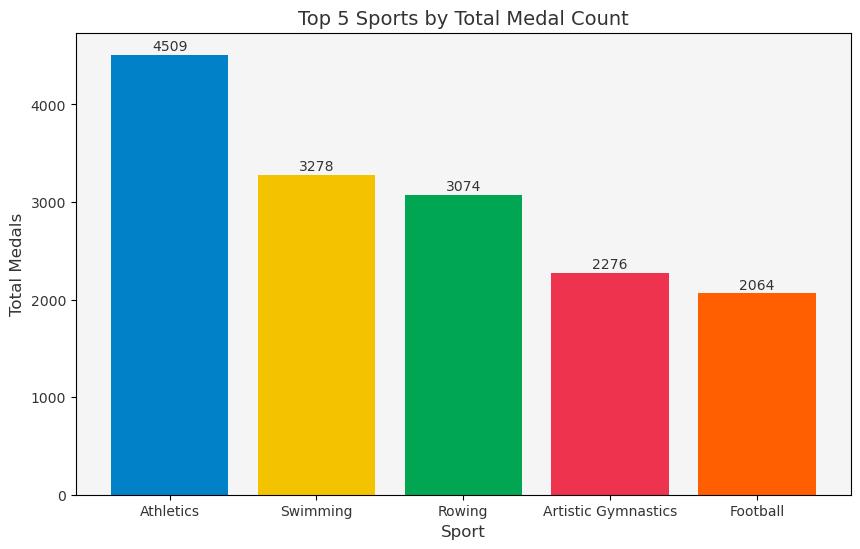

In [74]:
import matplotlib.pyplot as plt

# Olympic theme colors for top sports
sports_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00']

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sports_medals['sport'], top_sports_medals['Total_Medals'], color=sports_colors)
plt.xlabel('Sport', fontsize=12, color='#333333')
plt.ylabel('Total Medals', fontsize=12, color='#333333')
plt.title('Top 5 Sports by Total Medal Count', fontsize=14, color='#333333')

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')

# Adding the medal count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='#333333', fontsize=10)

plt.show()

# Average Height and Weight of Athletes by Country

In [51]:
query = '''
    SELECT country, AVG(height) as Avg_Height, AVG(CAST(weight AS FLOAT)) as Avg_Weight
    FROM athlete_biography
    WHERE height IS NOT NULL AND weight IS NOT NULL
    GROUP BY country
    ORDER BY Avg_Height DESC;
'''
avg_height_weight_country = pd.read_sql(query, conn)
avg_height_weight_country

,country,Avg_Height,Avg_Weight
0,France United States,203.0,93.0
1,Finland South Africa,203.0,130.0
2,Hungary Slovakia,202.0,112.0
3,Serbia and Montenegro Spain,200.0,118.0
4,Argentina Australia,199.0,91.0
...,...,...,...
662,Lebanon United States,152.0,52.0
663,Japan United States,150.0,42.0
664,Azerbaijan Bulgaria,150.0,58.0
665,Independent Olympic Athletes Timor-Leste,148.0,43.0


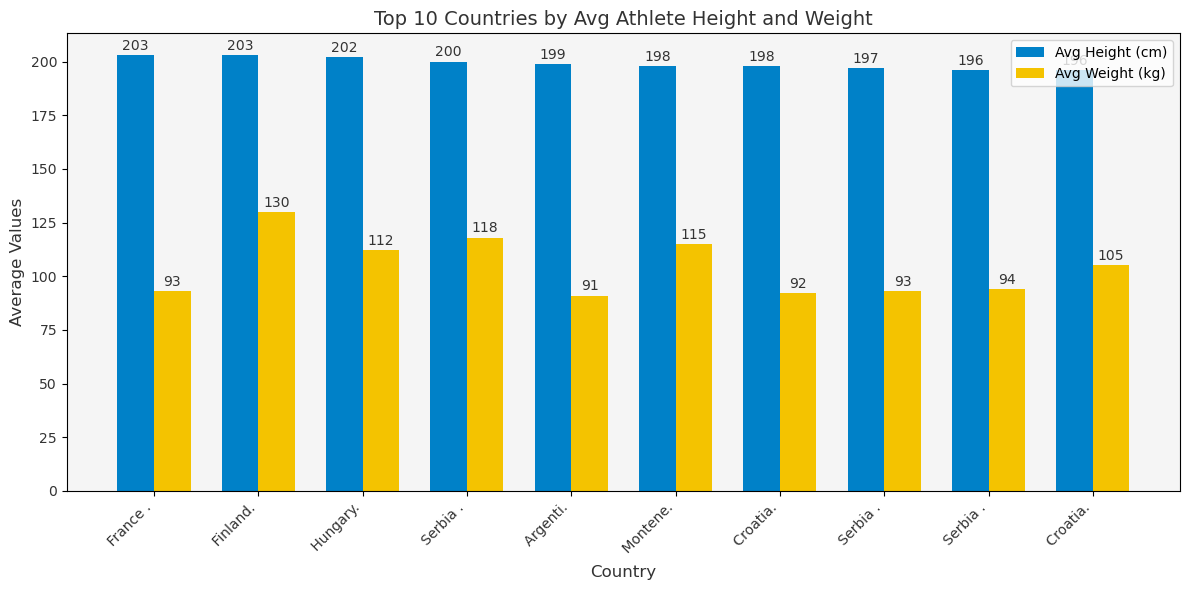

In [78]:

import matplotlib.pyplot as plt
import numpy as np

# Olympic theme colors for height and weight bars
height_color = '#0081C8'
weight_color = '#F4C300'

# Selecting the top 10 countries by average height
top_10_avg_height_weight = avg_height_weight_country.head(10).copy()  # Use .copy() to avoid the warning

# Shortening country names for better visibility
top_10_avg_height_weight.loc[:, 'short_country'] = top_10_avg_height_weight['country'].apply(lambda x: x[:8] + '.' if len(x) > 8 else x)

# Creating a plot with dual bars for height and weight
x = np.arange(len(top_10_avg_height_weight['short_country']))  # Country names as x-axis positions
width = 0.35  # Bar width

plt.figure(figsize=(12, 6))

# Bar chart for average height
bars1 = plt.bar(x - width/2, top_10_avg_height_weight['Avg_Height'], width, label='Avg Height (cm)', color=height_color)

# Bar chart for average weight
bars2 = plt.bar(x + width/2, top_10_avg_height_weight['Avg_Weight'], width, label='Avg Weight (kg)', color=weight_color)

# Adding labels, title, and ticks
plt.xlabel('Country', fontsize=12, color='#333333')
plt.ylabel('Average Values', fontsize=12, color='#333333')
plt.title('Top 10 Countries by Avg Athlete Height and Weight', fontsize=14, color='#333333')
plt.xticks(x, top_10_avg_height_weight['short_country'], color='#333333', rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')

# Adding value labels for height and weight bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='#333333', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='#333333', fontsize=10)

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


# Top 5 Most Popular Sports by Medal Count

In [52]:
query = '''
    SELECT sport, COUNT(medal) as Total_Medals
    FROM athlete_event_details
    WHERE medal IS NOT NULL
    GROUP BY sport
    ORDER BY Total_Medals DESC
    LIMIT 5;
'''
top_sports_medals = pd.read_sql(query, conn)
top_sports_medals

,sport,Total_Medals
0,Athletics,4509
1,Swimming,3278
2,Rowing,3074
3,Artistic Gymnastics,2276
4,Football,2064


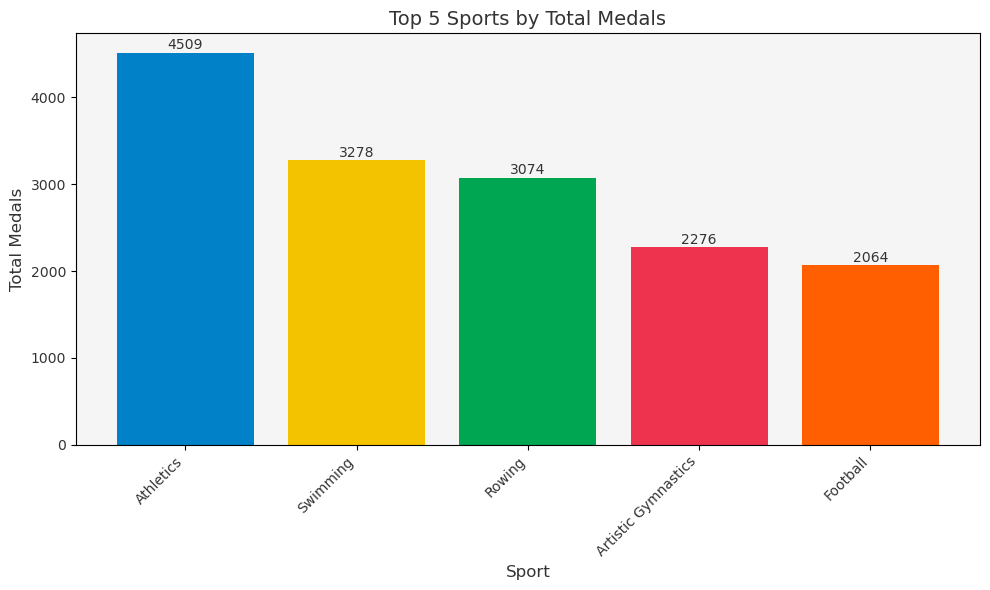

In [79]:
import matplotlib.pyplot as plt

# Olympic theme colors
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00']

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sports_medals['sport'], top_sports_medals['Total_Medals'], color=bar_colors)

# Customizing the plot
plt.xlabel('Sport', fontsize=12, color='#333333')
plt.ylabel('Total Medals', fontsize=12, color='#333333')
plt.title('Top 5 Sports by Total Medals', fontsize=14, color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background

# Customizing axis ticks
plt.xticks(color='#333333', rotation=45, ha='right')
plt.yticks(color='#333333')

# Adding value labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='#333333', fontsize=10)

plt.tight_layout()
plt.show()

# Total Medals by Year (Time Series Analysis)

In [53]:
query = '''
    SELECT year, SUM(total) as Total_Medals
    FROM medal_tally_history
    GROUP BY year
    ORDER BY year;
'''
total_medals_by_year = pd.read_sql(query, conn)
total_medals_by_year

,year,Total_Medals
0,1896,122
1,1900,284
2,1904,280
3,1906,224
4,1908,324
5,1912,317
6,1920,449
7,1924,442
8,1928,397
9,1932,412


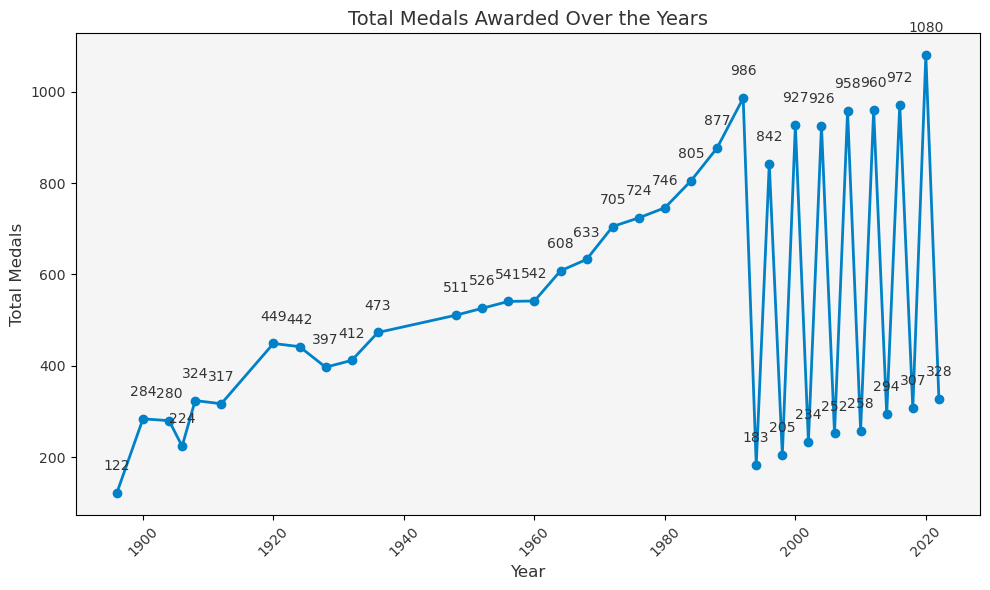

In [80]:
import matplotlib.pyplot as plt

# Olympic theme color for the line
line_color = '#0081C8'

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(total_medals_by_year['year'], total_medals_by_year['Total_Medals'], color=line_color, marker='o', linestyle='-', linewidth=2)

# Customizing the plot
plt.xlabel('Year', fontsize=12, color='#333333')
plt.ylabel('Total Medals', fontsize=12, color='#333333')
plt.title('Total Medals Awarded Over the Years', fontsize=14, color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background

# Customizing axis ticks
plt.xticks(color='#333333', rotation=45)
plt.yticks(color='#333333')

# Adding values for each year
for i, row in total_medals_by_year.iterrows():
    plt.text(row['year'], row['Total_Medals'] + 50, f'{row["Total_Medals"]}', ha='center', color='#333333', fontsize=10)

plt.tight_layout()
plt.show()


# Distribution of Medals by Gender

In [54]:
query = '''
    SELECT sex, COUNT(medal) as Total_Medals
    FROM athlete_biography ab
    JOIN athlete_event_details aed ON ab.athlete_id = aed.athlete_id
    WHERE medal IS NOT NULL
    GROUP BY sex;
'''
medals_by_gender = pd.read_sql(query, conn)
medals_by_gender

,sex,Total_Medals
0,Female,13439
1,Male,31247


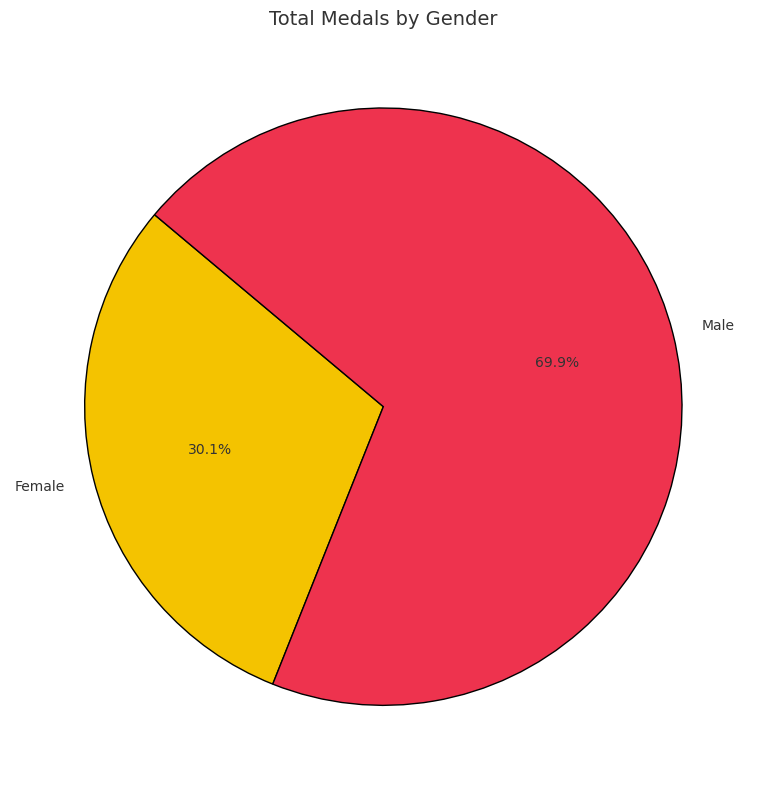

In [82]:
import matplotlib.pyplot as plt

# Olympic theme colors for the pie chart
pie_colors = ['#F4C300', '#EE334E']  # Gold and red for different genders

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(medals_by_gender['Total_Medals'], 
        labels=medals_by_gender['sex'], 
        colors=pie_colors, 
        autopct='%1.1f%%',  # Show percentage
        startangle=140,    # Start angle for better layout
        wedgeprops={'edgecolor': 'black'},  # Black edge for each wedge
        textprops={'color': '#333333'})  # Text color for labels and percentages

# Customizing the plot
plt.title('Total Medals by Gender', fontsize=14, color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background

plt.tight_layout()
plt.show()


# Top 10 Cities that Hosted the Most Games

In [55]:
query = '''
    SELECT city, COUNT(edition) as Total_Games
    FROM games_summary
    GROUP BY city
    ORDER BY Total_Games DESC
    LIMIT 10;
'''
top_cities_hosting = pd.read_sql(query, conn)
top_cities_hosting

,city,Total_Games
0,London,4
1,Paris,3
2,Los Angeles,3
3,Athina,3
4,Tokyo,2
5,Stockholm,2
6,Sankt Moritz,2
7,Lake Placid,2
8,Innsbruck,2
9,Helsinki,2


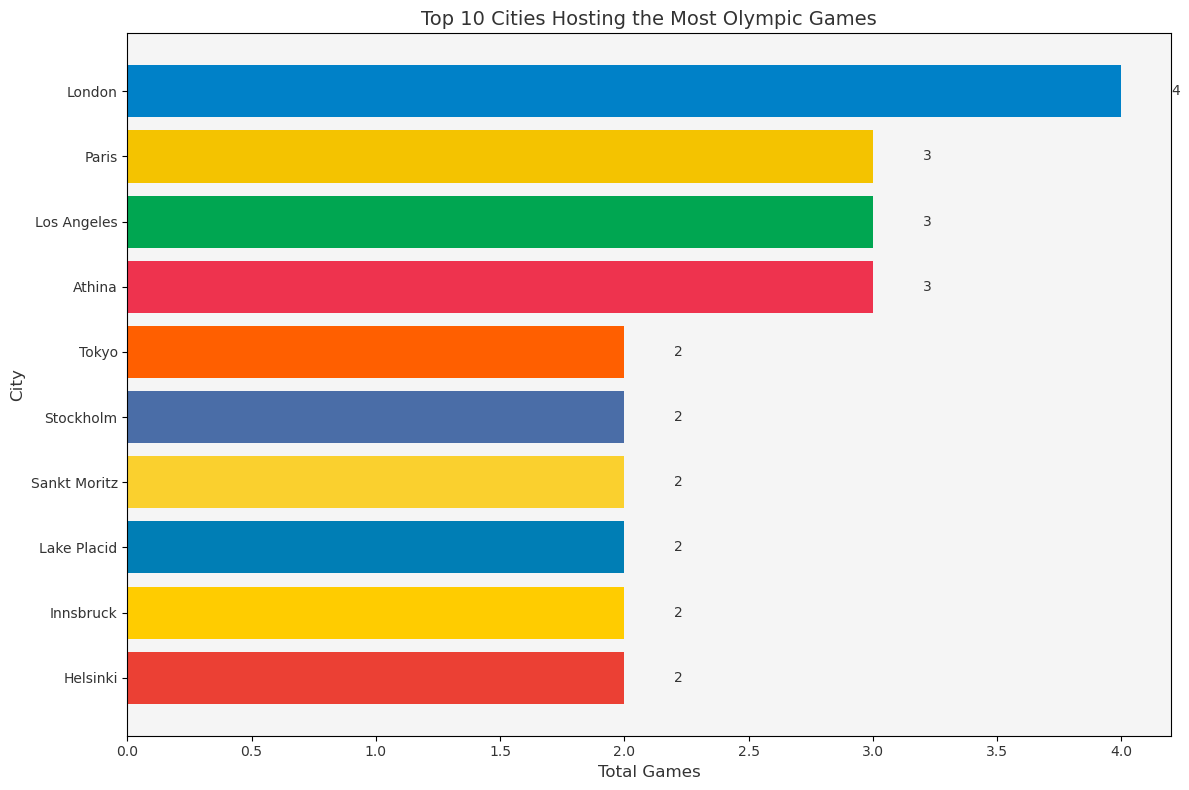

In [83]:
import matplotlib.pyplot as plt

# Olympic theme colors for the bars
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', 
              '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_cities_hosting['city'], top_cities_hosting['Total_Games'], color=bar_colors)

# Adding counts on each bar
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', color='#333333', fontsize=10)

# Customizing the plot
plt.xlabel('Total Games', fontsize=12, color='#333333')
plt.ylabel('City', fontsize=12, color='#333333')
plt.title('Top 10 Cities Hosting the Most Olympic Games', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for better contrast

plt.tight_layout()
plt.show()

# Medal Distribution by Event Type

In [56]:
query = '''
    SELECT event, COUNT(medal) as Total_Medals
    FROM athlete_event_details
    WHERE medal IS NOT NULL
    GROUP BY event
    ORDER BY Total_Medals DESC
    LIMIT 10;
'''
medals_by_event = pd.read_sql(query, conn)
medals_by_event

,event,Total_Medals
0,"Football, Men",1627
1,"Ice Hockey, Men",1430
2,"Hockey, Men",1228
3,"Water Polo, Men",946
4,"Eights, Men",801
5,"Basketball, Men",731
6,"Team All-Around, Men",688
7,"Handball, Men",650
8,"Team, Men",573
9,"Team, Open",553


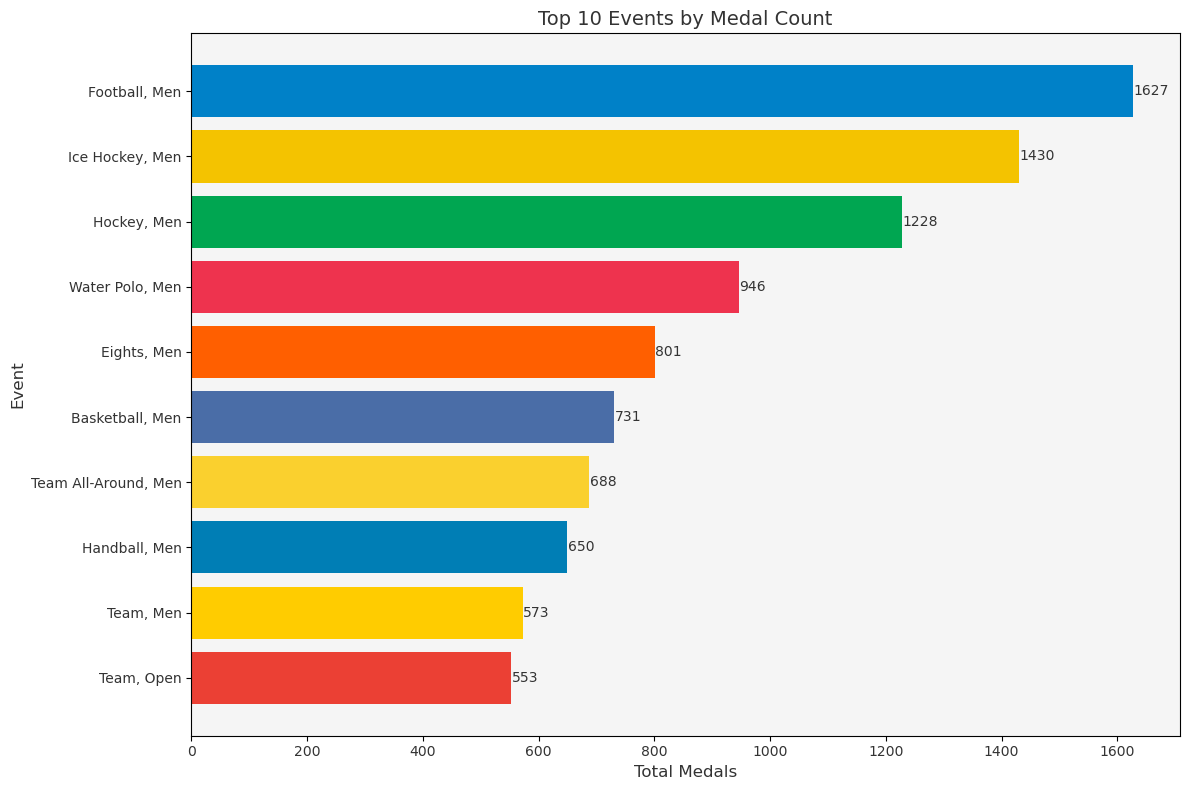

In [84]:
import matplotlib.pyplot as plt

# Olympic theme colors for the bars
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', 
              '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(medals_by_event['event'], medals_by_event['Total_Medals'], color=bar_colors)

# Adding counts on each bar
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', color='#333333', fontsize=10)

# Customizing the plot
plt.xlabel('Total Medals', fontsize=12, color='#333333')
plt.ylabel('Event', fontsize=12, color='#333333')
plt.title('Top 10 Events by Medal Count', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for better contrast

plt.tight_layout()
plt.show()

# Athletes with the Longest Career (By Number of Games Participated)

In [57]:
query = '''
    SELECT athlete, COUNT(DISTINCT edition) as Games_Participated
    FROM athlete_event_details
    GROUP BY athlete
    ORDER BY Games_Participated DESC
    LIMIT 10;
'''
athletes_longest_career = pd.read_sql(query, conn)
athletes_longest_career

,athlete,Games_Participated
0,Ian Millar,10
1,Vladimir Morozov,9
2,Vladimir Andreyev,9
3,Sven Johansson,9
4,Nino Salukvadze,9
5,Luis Martínez,9
6,José Ramos,9
7,Hubert Raudaschl,9
8,Antonio García,9
9,Andrew Nicholson,9


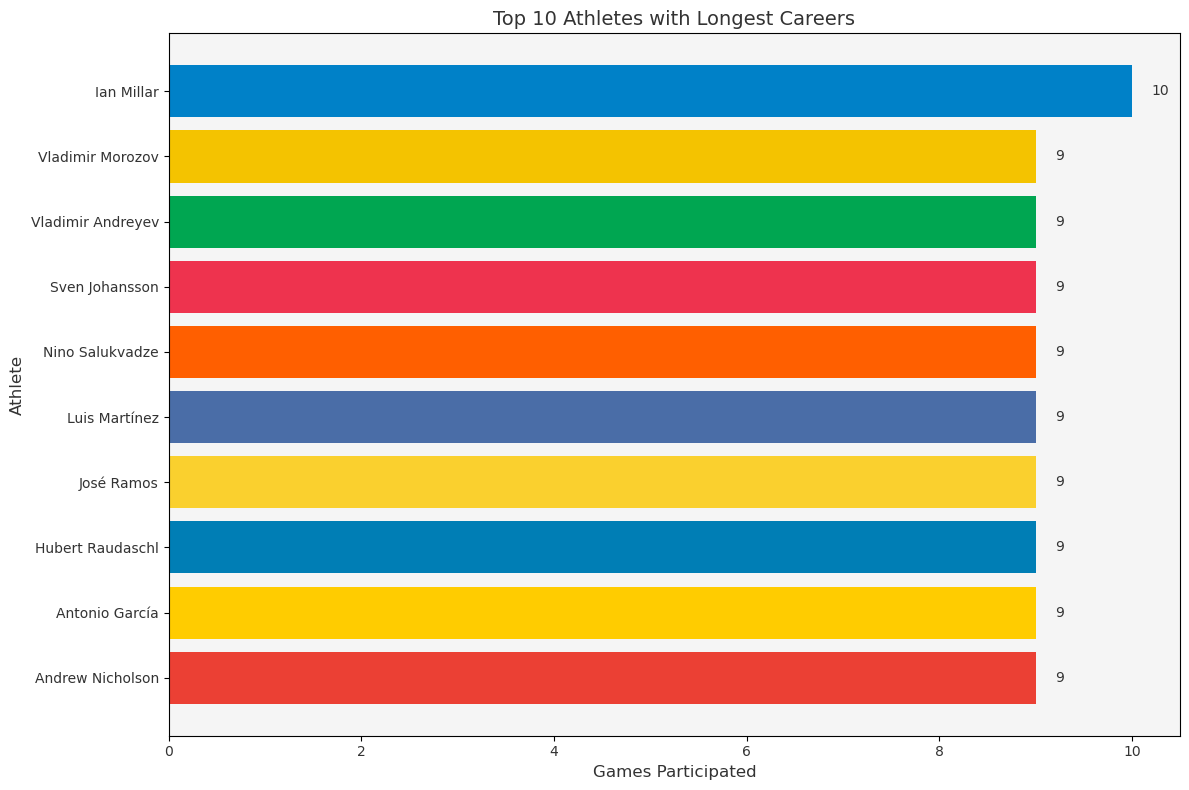

In [85]:
import matplotlib.pyplot as plt

# Olympic theme colors for the bars
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', 
              '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(athletes_longest_career['athlete'], athletes_longest_career['Games_Participated'], color=bar_colors)

# Adding counts on each bar
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', color='#333333', fontsize=10)

# Customizing the plot
plt.xlabel('Games Participated', fontsize=12, color='#333333')
plt.ylabel('Athlete', fontsize=12, color='#333333')
plt.title('Top 10 Athletes with Longest Careers', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for better contrast

plt.tight_layout()
plt.show()


# Countries with the Most Gold Medals in a Single Year

In [58]:
query = '''
    SELECT country, year, MAX(gold) as Most_Gold_Medals
    FROM medal_tally_history
    GROUP BY country, year
    ORDER BY Most_Gold_Medals DESC
    LIMIT 10;
'''
top_gold_single_year = pd.read_sql(query, conn)
top_gold_single_year

,country,year,Most_Gold_Medals
0,United States,1984,83
1,Soviet Union,1980,80
2,United States,1904,80
3,Great Britain,1908,56
4,Soviet Union,1988,55
5,Soviet Union,1972,50
6,Soviet Union,1976,49
7,People's Republic of China,2008,48
8,United States,2012,48
9,East Germany,1980,47


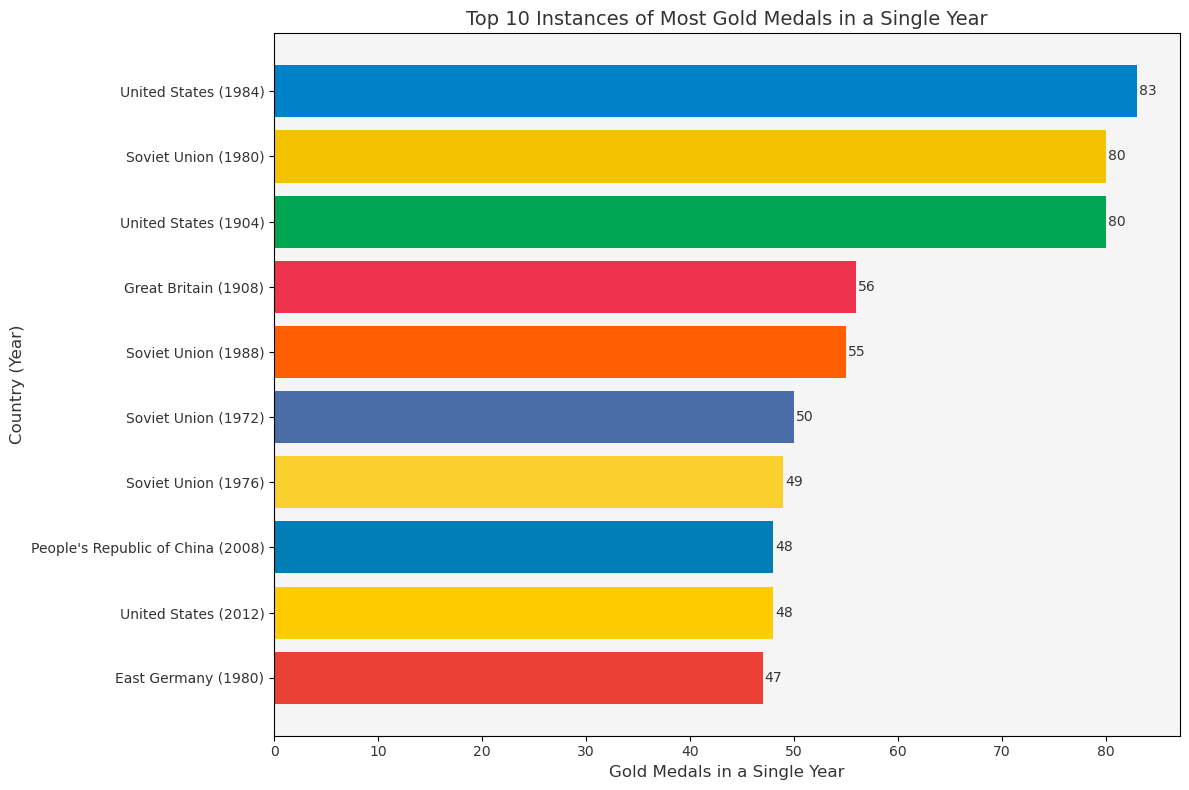

In [86]:
import matplotlib.pyplot as plt

# Olympic theme colors for the bars
bar_colors = ['#0081C8', '#F4C300', '#00A651', '#EE334E', '#FF5F00', 
              '#4A6DA7', '#FAD02E', '#007EB5', '#FFCC00', '#EB4034']

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_gold_single_year['country'] + ' (' + top_gold_single_year['year'].astype(str) + ')', 
                top_gold_single_year['Most_Gold_Medals'], 
                color=bar_colors)

# Adding counts on each bar
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', color='#333333', fontsize=10)

# Customizing the plot
plt.xlabel('Gold Medals in a Single Year', fontsize=12, color='#333333')
plt.ylabel('Country (Year)', fontsize=12, color='#333333')
plt.title('Top 10 Instances of Most Gold Medals in a Single Year', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Customizing axis and background
plt.xticks(color='#333333')
plt.yticks(color='#333333')
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for better contrast

plt.tight_layout()
plt.show()
